Graficar y comparar las mejores skills basadas en los salarios mas altos, comparativa de remoto y presencial


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns
from datasets import load_dataset

#loading data
dataset_presencial = pd.read_csv("4_1_query_skills_based_salary.csv", sep=',')
dataset_remoto = pd.read_csv("4_2_query_skills_based_salary_remote.csv", sep=',')

In [ ]:
#unificar datasets para graficar
df_onsite = dataset_presencial.copy()
df_onsite['work_mode'] = 'Onsite'
df_remoto = dataset_remoto.copy()
df_remoto['work_mode'] = 'Remote'

,salary_avg,skill_name,work_mode
0,400000,svn,Onsite
1,179000,solidity,Onsite
2,160515,couchbase,Onsite
3,155486,datarobot,Onsite
4,155000,golang,Onsite
5,149000,mxnet,Onsite
6,147633,dplyr,Onsite
7,147500,vmware,Onsite
8,146734,terraform,Onsite
9,138500,twilio,Onsite


In [17]:
df_merged = pd.concat([df_remoto, df_onsite], ignore_index=True)
df_merged

,salary_avg,skill_name,work_mode
0,208172,pyspark,Remote
1,189155,bitbucket,Remote
2,160515,watson,Remote
3,160515,couchbase,Remote
4,155486,datarobot,Remote
5,154500,gitlab,Remote
6,153750,swift,Remote
7,152777,jupyter,Remote
8,151821,pandas,Remote
9,145000,golang,Remote


In [29]:
work_modes = df_merged['work_mode'].unique().tolist()
print(work_modes)

['Remote', 'Onsite']


C:\Users\moco\AppData\Local\Temp\ipykernel_20404\784879569.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='salary_avg', y='skill_name', ax=ax[i],  palette=palette)
C:\Users\moco\AppData\Local\Temp\ipykernel_20404\784879569.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[i].legend().set_visible(False)
C:\Users\moco\AppData\Local\Temp\ipykernel_20404\784879569.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='salary_avg', y='skill_name', ax=ax[i],  palette=palette)
C:\Users\moco\AppData\Local\Temp\ipykernel_20404\78487

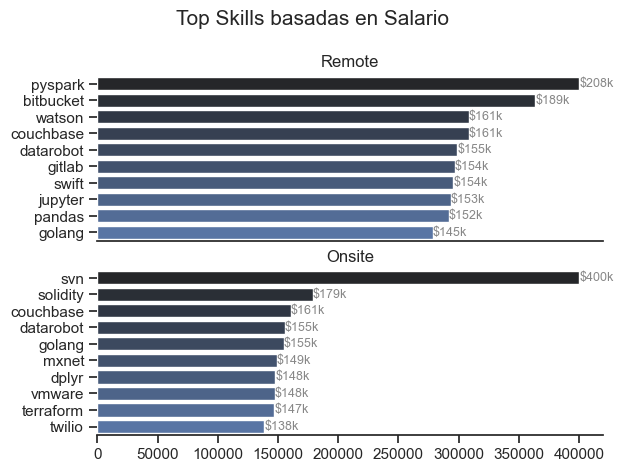

In [ ]:
work_modes = df_merged['work_mode'].unique()

fig, ax = plt.subplots(len(work_modes), 1)

sns.set_theme(style='ticks')

for i, mode in enumerate(work_modes):
    df_plot = df_merged[df_merged['work_mode'] == mode].head(10)
    palette = sns.color_palette('dark:b', n_colors=len(df_plot))
    sns.barplot(data=df_plot, x='salary_avg', y='skill_name', ax=ax[i],  palette=palette)
    ax[i].set_title(mode)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim()
    
    for _, row in df_plot.iterrows():
        ax[i].text(
            row['demand_count'],
            row['salary_avg'],
            f"${row['salary_avg']/1000:.0f}k",
            fontsize=8,
            ha='left',
            va='bottom'
        )
        
    if i != len(work_modes) -1:    
        ax[i].set_xticks([])

sns.despine(left=True, bottom=False)    
fig.suptitle('Top Skills basadas en Salario', fontsize=15)
fig.tight_layout(h_pad=0.5) #fix the overlap
plt.show()